In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


'''
Notes: Some of these graphs are very large and so I had difficulty importing them
into my final deliverable. Additionally, I wrote most of this in a Jupyter Notebook,
so I didn't have to explicitly call plt.show() to display my graphs. It also means
that sometimes you see output at the end of a cell, which can be disregaded except
as a sanity/type check

'''

#Begin by parsing data

rawData = ["daily_06_037_1103_2016.csv", "daily_06_037_1103_2017.csv", "daily_06_037_1103_2018.csv",
          "daily_06_037_1103_2019.csv", "daily_06_037_1103_2020.csv"]

allYears = []
for i in rawData:
    # Read the columns we want
    df = pd.read_csv(i, usecols=["Parameter Name", "Date (Local)", "Arithmetic Mean"])

    # Change date to datetime object
    df["Date (Local)"] = pd.to_datetime(df["Date (Local)"])

    #Only keep the rows that contain PM2.5 data
    df = df[(df["Parameter Name"].str.contains("PM2.5 LC"))]
    
    allYears.append(df)

In [10]:
#Let's start off by looking only at the data for one year. In this case, the first year, 2016
oneYear = allYears[0]

In [11]:
#To get a sense of the information:
oneYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12517 entries, 0 to 36194
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Parameter Name   12517 non-null  object        
 1   Date (Local)     12517 non-null  datetime64[ns]
 2   Arithmetic Mean  12517 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 391.2+ KB


In [17]:
oneYear.isnull().sum()

Parameter Name     0
Date (Local)       0
Arithmetic Mean    0
dtype: int64

67


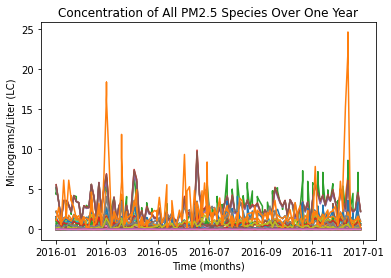

In [80]:
#Here's a graph of all of the species' concentrations...not very helpful for detailed
#analysis but good for a general overview

byParameter = oneYear.groupby("Parameter Name")
for key, grp in byParameter:
    plt.plot(grp["Date (Local)"], grp["Arithmetic Mean"])

#Get the number of unique parameters - will be useful later
print(len(oneYear["Parameter Name"].unique()))

plt.title("Concentration of All PM2.5 Species Over One Year")
plt.xlabel("Time (months)")
plt.ylabel("Micrograms/Liter (LC)")
plt.savefig("ConcentrationOfAllPM2.5SpeciesOverOneYear.png")

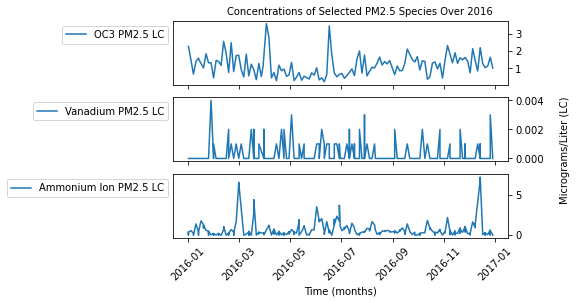

In [82]:
#Let's just look at any 3 species to get a sense of what each 
#individual species will look like. In this case, 
#I chose the first 3 available.

fig, ax = plt.subplots(3, 1, sharex=True)
for i in range(3):
    oneParameter = oneYear[oneYear["Parameter Name"] == oneYear["Parameter Name"][i]]
    ax[i].plot(oneParameter["Date (Local)"], oneParameter["Arithmetic Mean"], label=oneYear["Parameter Name"][i])
    ax[i].legend(bbox_to_anchor=(0, 1))
    ax[i].yaxis.set_label_position("right")
    ax[i].yaxis.tick_right()
    
plt.xticks(rotation=45)
fig.text(1.02, 0.25, "Micrograms/Liter (LC)", rotation=90)
plt.xlabel("Time (months)")
fig.text(0.25, 0.90, "Concentrations of Selected PM2.5 Species Over 2016")
plt.savefig("ConcentrationsOfSelectedPM2.5SpeciesOver2016.png")

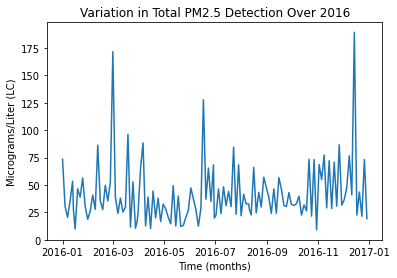

In [83]:
#Now let's look at the culumative sum of PM2.5 species per day

sumDay = oneYear.groupby("Date (Local)").sum("Arithmetic Mean").reset_index()

plt.plot(sumDay["Date (Local)"], sumDay["Arithmetic Mean"])

plt.title("Variation in Total PM2.5 Detection Over 2016")
plt.xlabel("Time (months)")
plt.ylabel("Micrograms/Liter (LC)")
plt.savefig("VariationInTotalPM2.5DetectionOver2016.png")

 Total Nitrate PM2.5 LC

 OC CSN_Rev Unadjusted PM2.5 LC TOT


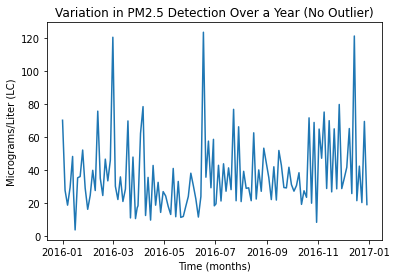

In [84]:
#There's an outlier I noticed from the graph of all species concentrations
#(the first graph), so let's see what the sum of concentrations per
#day looks like without the outlier

#The outlier seems to be total nitrate concentrations
outlier = oneYear[oneYear["Arithmetic Mean"] == oneYear["Arithmetic Mean"].max()]
print(outlier["Parameter Name"].to_string(index=False))

#let's remove all instances of total nitrate concentrations
noOutlier = oneYear[oneYear["Parameter Name"] != "Total Nitrate PM2.5 LC"]

#Sanity check that the correct parameter was removed
outlier = noOutlier[noOutlier["Arithmetic Mean"] == noOutlier["Arithmetic Mean"].max()]
print("\n" + outlier["Parameter Name"].to_string(index=False))

#Try graphing again without the outlier. Still same trend, which is good
sumDayNoOutlier = noOutlier.groupby("Date (Local)").sum("Arithmetic Mean").reset_index()

plt.plot(sumDayNoOutlier["Date (Local)"], sumDayNoOutlier["Arithmetic Mean"])

plt.title("Variation in PM2.5 Detection Over a Year (No Outlier)")
plt.xlabel("Time (months)")
plt.ylabel("Micrograms/Liter (LC)")
plt.savefig("VariationInTotalPM2.5DetectionOver2016NoOutlier.png")

In [85]:
#Let's find out what days the thee big spikes are

threeDays = sumDayNoOutlier["Arithmetic Mean"].nlargest(n=3)
for day in threeDays:
   print(sumDayNoOutlier[sumDayNoOutlier["Arithmetic Mean"] == day], end="\n\n")

#Well...there doesn't appear to be a specific reason for the spikes
#None of the days are special as far as I know


   Date (Local)  Arithmetic Mean
58   2016-06-17        123.32181

    Date (Local)  Arithmetic Mean
119   2016-12-14        121.04824

   Date (Local)  Arithmetic Mean
21   2016-03-01        120.30023



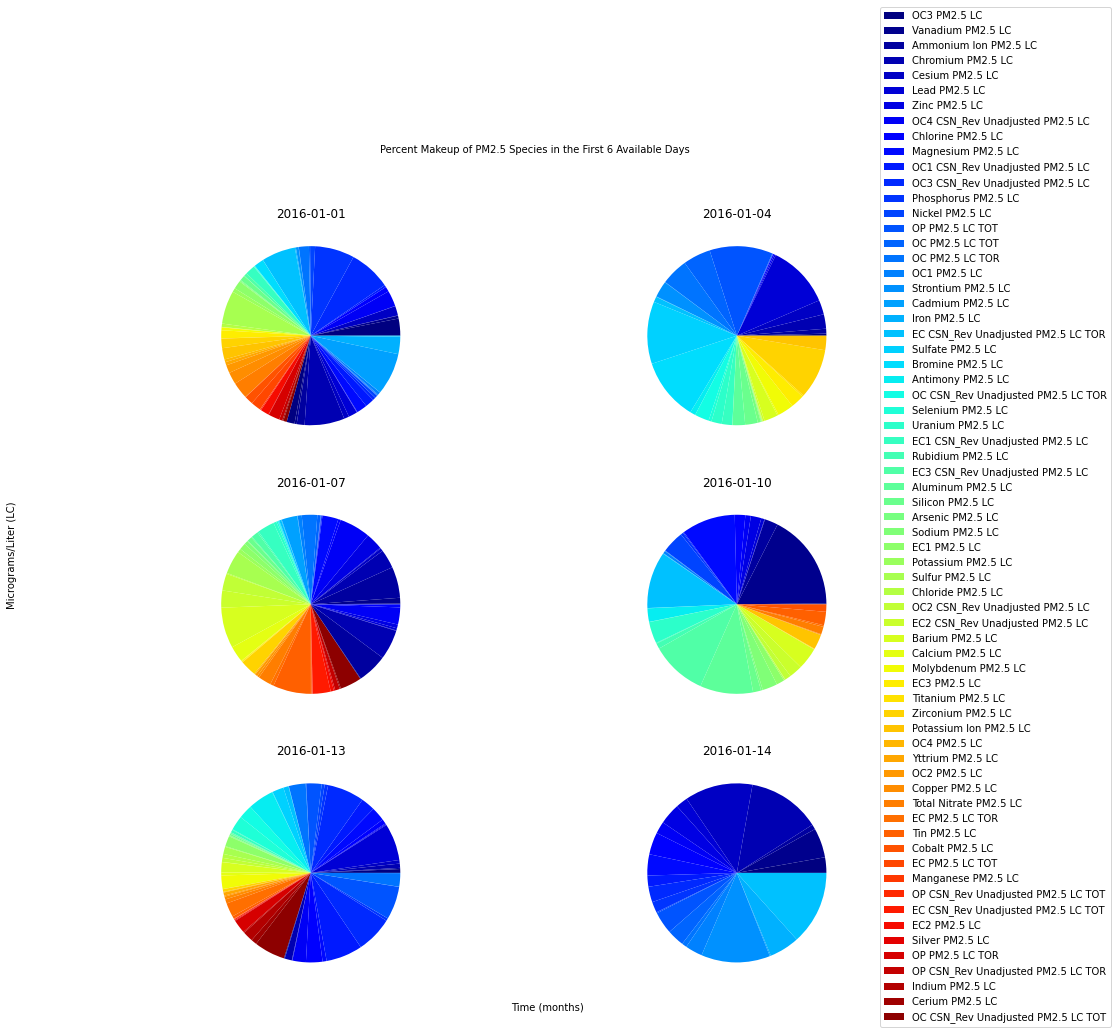

In [86]:
#Let's look at the % makeup of species from the first 6 recorded days

#create a 3 x 2 subplot
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(14,14))

#pie chart only has 10 colors then starts repeating, we need more than that
cs=cm.jet(np.arange(67)/67.)

counter = 0
for i in range(3):
    for j in range(2):
        #get the i+j day
        oneDay = oneYear[oneYear["Date (Local)"] == oneYear["Date (Local)"].unique()[counter]]
        
        #graph the pollutant levels on that day
        ax[i, j].pie(oneDay["Arithmetic Mean"][oneDay["Arithmetic Mean"] > 0], colors=cs)
        ax[i, j].set_title(np.datetime_as_string(oneYear["Date (Local)"].unique()[counter])[:10])
        counter += 1
        


#The figure legend is very very big, needs to be outside the plot
fig.legend(oneYear["Parameter Name"].unique(), bbox_to_anchor=(1.1, 1.1))


#Labels are excluded from the final product because there are too many
#parameters to graph. Even if I split the labels different among each
#chart, the plot quickly becomes too crowded with overlaps. 
plt.xticks(rotation=45)
fig.text(0, 0.5, "Micrograms/Liter (LC)", rotation=90)
fig.text(0.5, 0.1, "Time (months)")
fig.text(0.37, 0.95, "Percent Makeup of PM2.5 Species in the First 6 Available Days")
plt.savefig("PercentMakeupOfPM2.5SpeciesInTheFirst6AvailableDays.png")

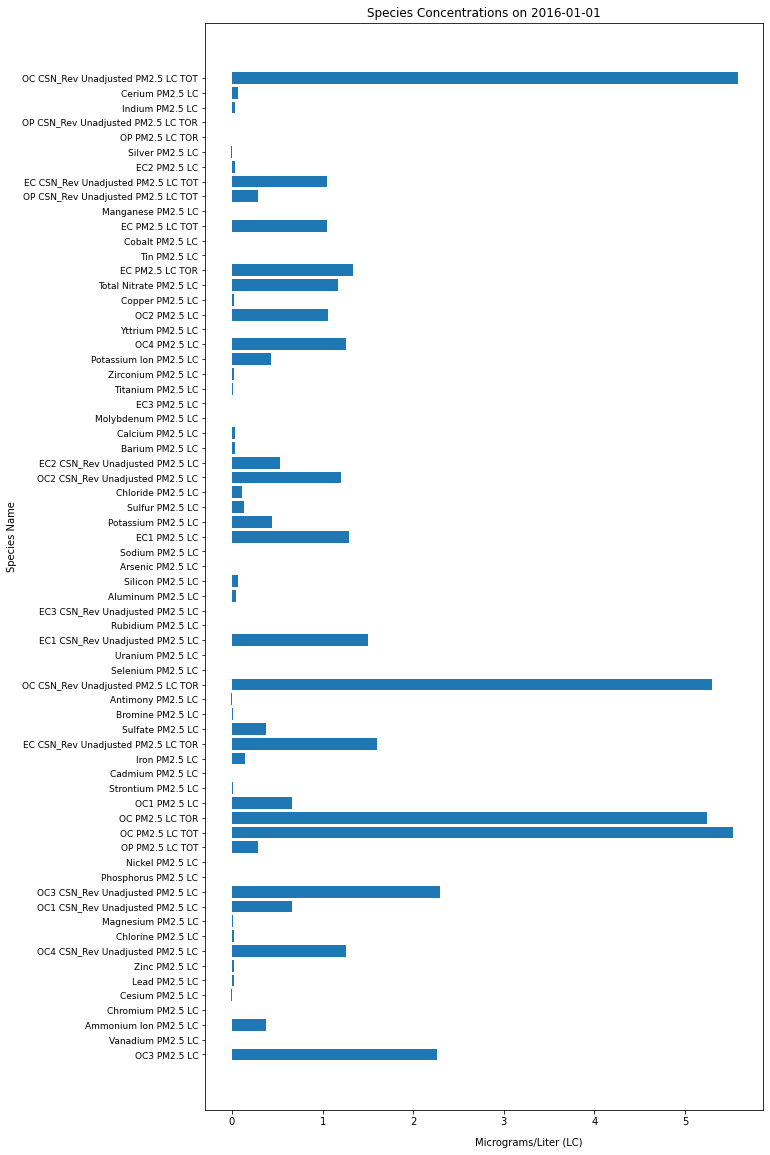

In [87]:
# While the above plots are great for getting a sense of the breakdown 
# per day, a lack of labels and exact percentges makes it difficult
# to have a more exact sense.

#Let's see a bar plot of the first day for some concrete numbers
oneDay = oneYear[oneYear["Date (Local)"] == oneYear["Date (Local)"].unique()[0]]

fig, ax = plt.subplots(figsize=(10, 20))
#graph the pollutant levels on that day
ax.barh(oneDay["Parameter Name"], oneDay["Arithmetic Mean"])
ax.set_title("Species Concentrations on " + np.datetime_as_string(oneYear["Date (Local)"].unique()[0])[:10])
ax.tick_params(axis='y', labelsize=9)

fig.text(-0.15, 0.5, "Species Name", rotation=90)
fig.text(0.5, 0.1, "Micrograms/Liter (LC)")
plt.savefig("SpeciesConcentrationOn2016-01-01.png")

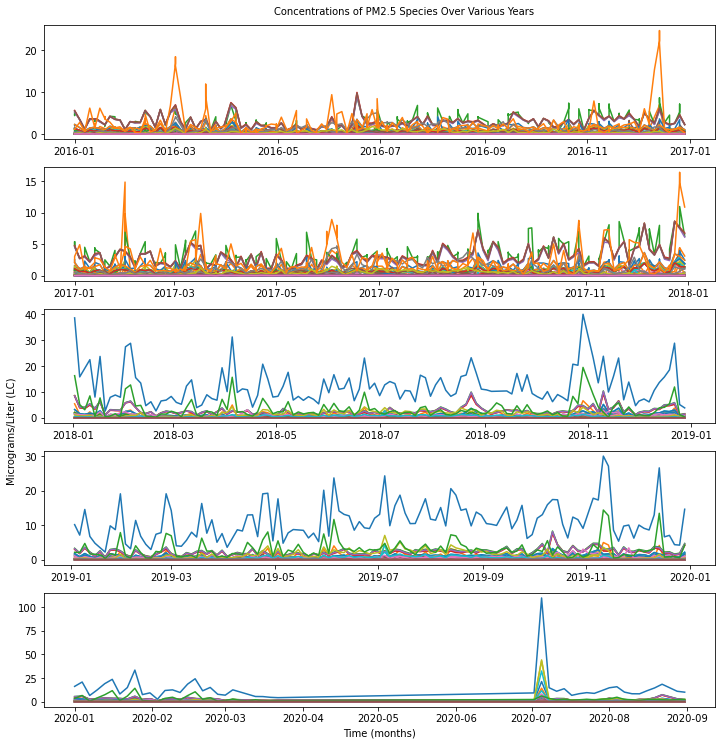

In [88]:
#Now that we've got a sense of how things are, let's expand outwards and look at yearly trends
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

for i in range(5):
    byParameter = allYears[i].groupby("Parameter Name")
    for key, grp in byParameter:
        ax[i].plot(grp["Date (Local)"], grp["Arithmetic Mean"])
        
fig.tight_layout()

fig.text(0, 0.35, "Micrograms/Liter (LC)", rotation=90)
plt.xlabel("Time (months)")
fig.text(0.37, 1, "Concentrations of PM2.5 Species Over Various Years")
plt.savefig("ConcentrationsOfPM2.5SpeciesOverVariousYears.png")

Total Nitrate PM2.5 LC
Total Nitrate PM2.5 LC
Reconstructed Mass PM2.5 LC
Reconstructed Mass PM2.5 LC
Reconstructed Mass PM2.5 LC


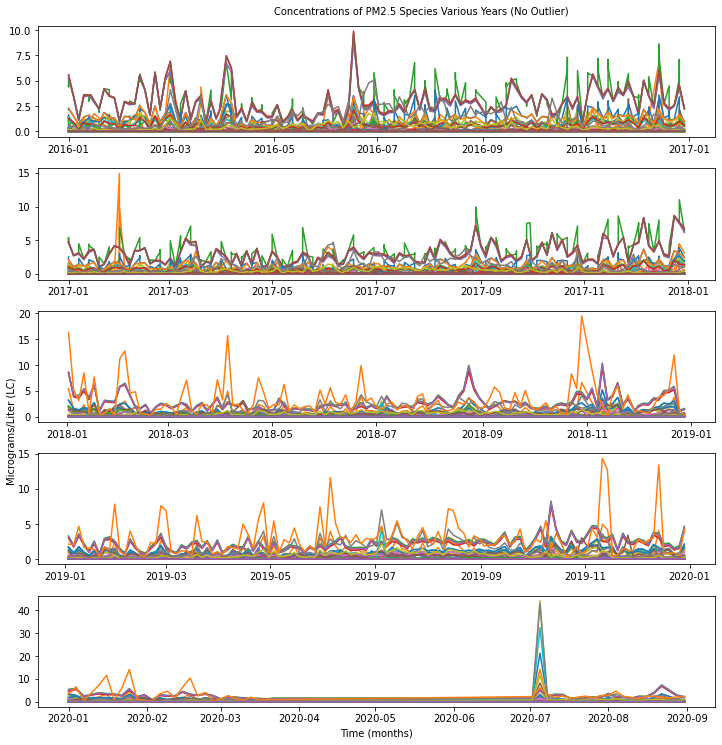

In [89]:
#for many of these, there appear to be outliers, so I'm going to remove them

#Let's see what the outliers are
outliers = []
for year in allYears:
    outlier = year[year["Arithmetic Mean"] == year["Arithmetic Mean"].max()]
    #note: strip whitespace
    outliers.append(outlier["Parameter Name"].to_string(index=False).strip())

    
for outlier in outliers:
    print(outlier)
    
noOutlierAllYears = [] 
for i in range(5):
    # Remove all instances of the outlier
    noOutlierAllYears.append(allYears[i][allYears[i]["Parameter Name"] != outliers[i]])  
    
#Then graph again

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

for i in range(5):
    byParameter = noOutlierAllYears[i].groupby("Parameter Name")
    for key, grp in byParameter:
        ax[i].plot(grp["Date (Local)"], grp["Arithmetic Mean"])
    
#Still got some peaks but not as bad as before
fig.tight_layout()
fig.text(0, 0.35, "Micrograms/Liter (LC)", rotation=90)
plt.xlabel("Time (months)")
fig.text(0.37, 1, "Concentrations of PM2.5 Species Various Years (No Outlier)")
plt.savefig("ConcentrationsOfPM2.5SpeciesOverVariousYears(NoOutlier).png")


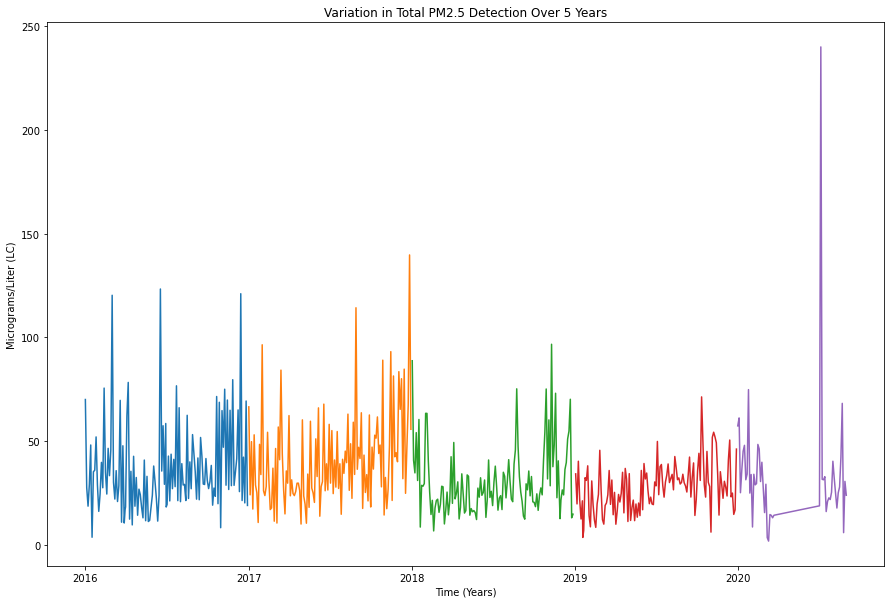

In [90]:
#Now for the culumative sum per day for every year

fig = plt.figure(figsize=(15, 10))

for year in noOutlierAllYears:
    sumDay = year.groupby("Date (Local)").sum("Arithmetic Mean").reset_index()
    plt.plot(sumDay["Date (Local)"], sumDay["Arithmetic Mean"])
    
    #or, alternatively, can use this line
    #sumDay = year.groupby("Date (Local)")["Arithmetic Mean"].sum()
    #plt.plot(sumDay)

plt.title("Variation in Total PM2.5 Detection Over 5 Years")
plt.xlabel("Time (Years)")
plt.ylabel("Micrograms/Liter (LC)")
plt.savefig("VariationInTotalPM2.5DetectionOver5Years.png")

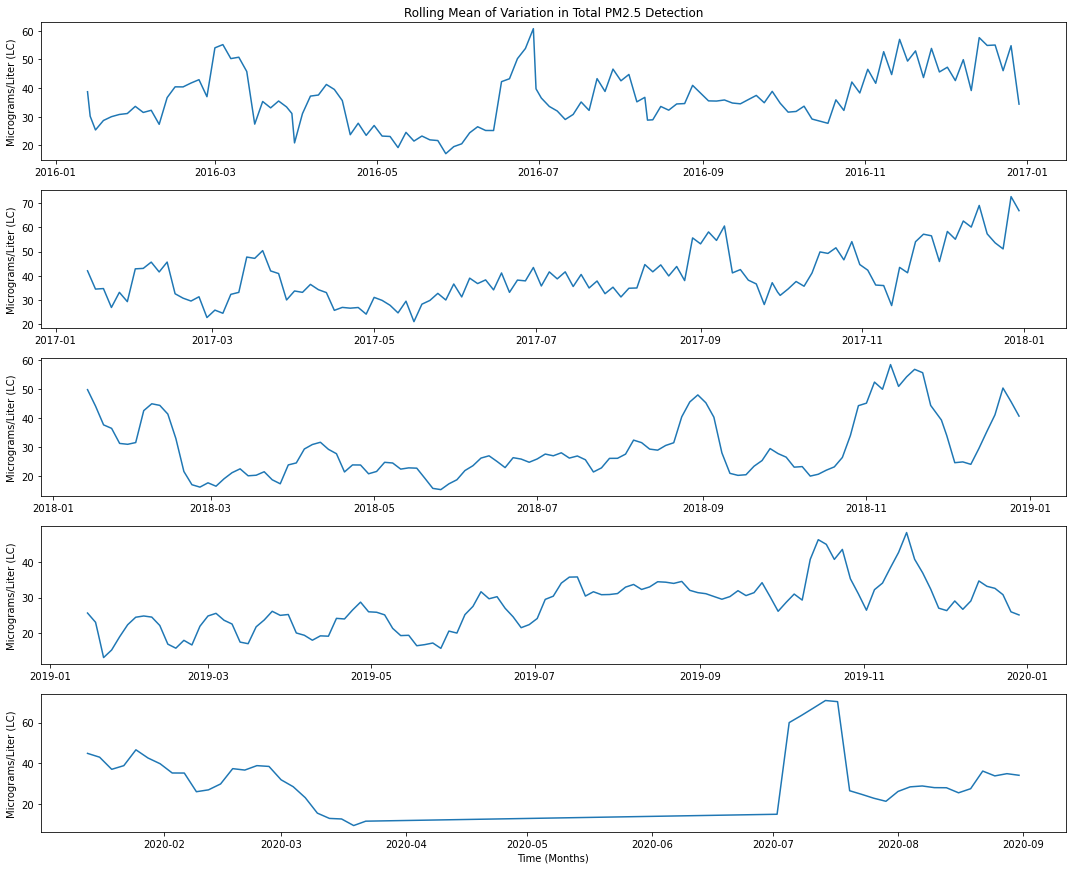

In [91]:
#Now for the rolling sum every 12 measured days for every year to 
#remove some noise from the above plot so trends are easier to see

fig, ax = plt.subplots(5, 1, figsize = (15, 12))

for i in range(5):
    sumDay = noOutlierAllYears[i].groupby("Date (Local)").sum("Arithmetic Mean").reset_index()
    ax[i].plot(sumDay["Date (Local)"], sumDay["Arithmetic Mean"].rolling(5).mean())
    ax[i].set_ylabel("Micrograms/Liter (LC)")


ax[0].set_title("Rolling Mean of Variation in Total PM2.5 Detection")        
fig.tight_layout()
plt.xlabel("Time (Months)")
plt.savefig("RollingMeanOfVariationInTotalPM2.5Detection.png")

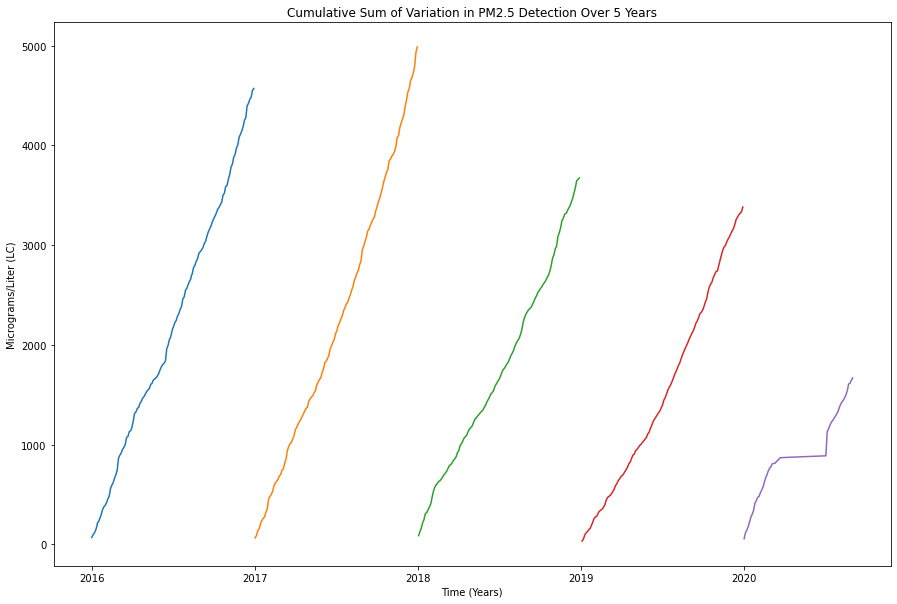

In [92]:
#Let's compare cumulative sum
#Growth trend throughout the year seems linear

fig = plt.figure(figsize=(15, 10))

for year in noOutlierAllYears:
    sumDay = year.groupby("Date (Local)").sum("Arithmetic Mean").reset_index()
    plt.plot(sumDay["Date (Local)"], sumDay["Arithmetic Mean"].cumsum())

plt.title("Cumulative Sum of Variation in PM2.5 Detection Over 5 Years")
plt.xlabel("Time (Years)")
plt.ylabel("Micrograms/Liter (LC)")
plt.savefig("CumulativeSumOfVariationInPM2.5DetectionOver5Years.png")